In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import pandas as pd
import scipy.stats as stats

In [3]:
k_values = [[4.44,3.51,3.14,3.51],[3.51, 2.22, 1.57, 2.22],[3.14, 1.57, 0, 1.57], [3.51, 2.22, 1.57, 2.22]]


In [4]:
P_k = [[0.71, 1.6,  0.21, 1.6 ],[0.39, 0.18, 1.2, 1.24],[0.06, 0.22, 0.07, 0.22],
       [0.39, 1.24, 1.2, 0.18]]

In [5]:
start = [0, 1, 2, 3, 4]
end = [1, 2, 3, 4, 5]

In [6]:
#a function for splitting up ring sizes in the model
def equal_spacing(input_k):
    
    #creating empty values that will be replaced later
    min_value = input_k[0][0]
    max_value = input_k[0][0]
    
    #finding minimum and maximum values in 2D k-array
    for i in range(len(input_k)):
        for j in range(len(input_k[i])):
            min_value = min(min_value, input_k[i][j])
            max_value = max(max_value, input_k[i][j])
    
    #determining how many rings we will have
    #each ring will be equally spaced
    difference = max_value - min_value
    spacing = difference / (len(input_k) * len(input_k[0]) - 1)
    
    #these will be our "start" values in our find_element_positions function
    initial_values = [min_value + i * spacing for i in range(len(input_k) * len(input_k[0]))]
    #these will be our "end" values in our find_element_positions function
    spaced_values = [initial_values[i] + spacing for i in range(len(initial_values))]
    
    return initial_values, spaced_values

In [15]:
equal_spacing(k_values)

([0.0,
  0.29600000000000004,
  0.5920000000000001,
  0.8880000000000001,
  1.1840000000000002,
  1.4800000000000002,
  1.7760000000000002,
  2.072,
  2.3680000000000003,
  2.6640000000000006,
  2.9600000000000004,
  3.2560000000000002,
  3.5520000000000005,
  3.8480000000000008,
  4.144,
  4.44],
 [0.29600000000000004,
  0.5920000000000001,
  0.8880000000000001,
  1.1840000000000002,
  1.4800000000000002,
  1.7760000000000002,
  2.072,
  2.3680000000000003,
  2.6640000000000006,
  2.960000000000001,
  3.2560000000000002,
  3.5520000000000005,
  3.8480000000000008,
  4.144000000000001,
  4.44,
  4.736000000000001])

In [7]:
def find_element_positions(input_k, start, end):
    positions = []
    #iterating through each element in the start and end arrays
    for k in range(len(start)):
        sub_positions = []
        #iterating through first dimension of input_k
        for i in range(len(input_k)):
            #iterating through second dimension of input_k
            for j in range(len(input_k[0])):
                #for elements within our inputted desired range
                if start[k] <= input_k[i][j] <= end[k]:
                    sub_positions.append((i, j))
        positions.append(sub_positions)
    
    #will return tuples that given the locations of the elements in the given range
    return positions

In [8]:
#find corresponding [i,j] positions in fourier transform array 
#should be same dimensions as k array
    
def get_corresponding_values(input_k, fourier_array, start, end):
    #calling function that returns position tuples
    positions = find_element_positions(input_k, start, end)
    
    #empty list to store the values
    values = []
    
    #iterate through rows in the positions array
    for pos_row in positions:
        #initialize an empty list to store each row's values
        row_values = []
        #iterate through pair of indices in the row
        for i, j in pos_row:
            #index into fourier array and store value
            row_values.append(fourier_array[i][j])
            
        #append values for this row into overall values list
        values.append(row_values)
    
    return values


In [9]:
find_element_positions(k_values, start, end)

[[(2, 2)],
 [(1, 2), (2, 1), (2, 3), (3, 2)],
 [(1, 1), (1, 3), (3, 1), (3, 3)],
 [(0, 1), (0, 2), (0, 3), (1, 0), (2, 0), (3, 0)],
 [(0, 0)]]

In [10]:
get_corresponding_values(k_values, P_k, start, end)

[[0.07],
 [1.2, 0.22, 0.22, 1.2],
 [0.18, 1.24, 1.24, 0.18],
 [1.6, 0.21, 1.6, 0.39, 0.06, 0.39],
 [0.71]]

In [11]:
def avg_corresponding_values(input_k, fourier_array, start, end):
    
    #get our corresponding values 2D array
    values = get_corresponding_values(input_k, fourier_array, start, end)
    
    #creating empty avg_values array
    avg_values = []
    #separating out ranges
    for row in values:
        row_sum = 0
        #for each value in the row
        for i in row:
            row_sum += i
            #taking the average value for the row
            avg = row_sum/len(row)
            
        avg_values.append(avg)
    
    return avg_values
    

In [12]:
avg_corresponding_values(k_values, P_k, start, end)

[0.07, 0.71, 0.7100000000000001, 0.7083333333333334, 0.71]

In [13]:
#SHOULD EXPECT A FLAT LINE IN YOUR FINAL P(K) VS K PLOT
#maybe some noise due to the fact that it is such a small plot

def power_spectra_plot(input_k, fourier_array, start, end):
    
    #getting the average fourier value for the chosen k range
    avg_values = avg_corresponding_values(input_k, fourier_array, start, end)
    #list of integers from our chosen range values
    #will be the labels for the x-axis
    range_values = list(range(len(start)))
    
    plt.plot(range_values, avg_values)
    
    #plot specifications
    plt.xlabel("$k$", size = 12)
    plt.ylabel("$P(k)$", size = 12)
    plt.suptitle("Power Spectrum from a 2D Toy Box", size = 15)
    plt.tight_layout()

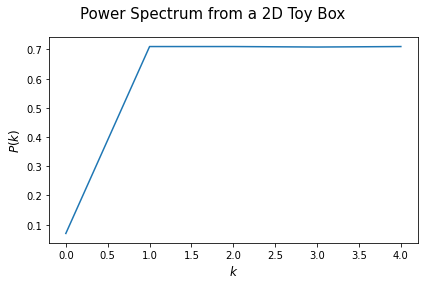

In [14]:
power_spectra_plot(k_values, P_k, start, end)